This is a pytorch beginner notebook for revision purpose

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset= MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



We have downloaded data. Now we will check the length of this data.

In [3]:
len(dataset)

60000

In [4]:
test_dataset= MNIST(root='data/', train=False)
len(test_dataset)

10000

label: 0


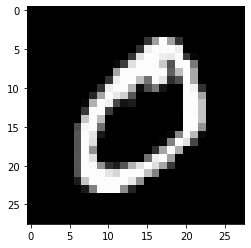

In [5]:
#Lets see our data item
import matplotlib.pyplot as plt
%matplotlib inline
image,label=dataset[1]
plt.imshow(image, cmap='gray')
print('label:', label)

We need to transform the images to tensor so our model can use it. For that we will use transforms from torchvision

In [6]:
import torchvision.transforms as transforms

In [7]:
dataset=MNIST(root='data/', train=True, transform=transforms.ToTensor()) #transforming image to tensor

In [8]:
img_tensor, label= dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


1 is the number of channel. Images are grayscale so we have 1. Other channel is RGB. 28x28 is image size and 5 is label of the image.

In [9]:
import numpy as np
#This function is to split the dataset into training and validation dataset
def split_indices(n, val_pct):
    n_val= int(val_pct*n)
    idxs= np.random.permutation(n)
    return idxs[n_val:], idxs[:n_val]

In [10]:
train_indices, val_indices=split_indices(len(dataset), val_pct=0.2)

In [11]:
print(len(train_indices), len(val_indices))

48000 12000


In [12]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [13]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [14]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the random_spilt method from PyTorch.

In [15]:
import torch.nn as nn

In [16]:
input_size=28*28
num_classes= 10

model=nn.Linear(input_size,num_classes)

In [17]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0325,  0.0035,  0.0305,  ...,  0.0098, -0.0302, -0.0077],
        [-0.0070, -0.0182,  0.0267,  ..., -0.0116, -0.0145,  0.0063],
        [-0.0004,  0.0243,  0.0161,  ...,  0.0189, -0.0125,  0.0242],
        ...,
        [ 0.0160,  0.0323, -0.0254,  ..., -0.0244, -0.0017, -0.0267],
        [-0.0257, -0.0274, -0.0332,  ..., -0.0062,  0.0030,  0.0105],
        [-0.0027, -0.0209,  0.0296,  ...,  0.0201, -0.0344, -0.0254]],
       requires_grad=True)

In [18]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0055,  0.0122,  0.0080, -0.0114,  0.0350, -0.0124,  0.0103, -0.0188,
        -0.0155,  0.0067], requires_grad=True)

In [19]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    #outputs = model(images)
    #print(outputs)
    break

tensor([4, 3, 1, 2, 5, 5, 7, 5, 6, 5, 2, 8, 1, 2, 4, 9, 3, 6, 1, 9, 0, 6, 1, 3,
        6, 1, 1, 4, 5, 6, 9, 3, 7, 3, 1, 1, 1, 1, 0, 2, 0, 8, 7, 4, 7, 6, 4, 1,
        3, 4, 0, 1, 7, 1, 4, 1, 2, 1, 5, 6, 7, 7, 5, 2, 0, 6, 8, 9, 0, 2, 3, 4,
        7, 8, 8, 2, 2, 5, 1, 2, 0, 8, 0, 5, 0, 1, 9, 1, 7, 9, 7, 4, 8, 5, 3, 9,
        6, 4, 8, 8, 2, 2, 1, 1, 5, 0, 4, 9, 3, 8, 1, 1, 9, 8, 3, 7, 3, 0, 5, 8,
        8, 1, 5, 5, 1, 4, 8, 2])
torch.Size([128, 1, 28, 28])


In [20]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [21]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

xb.reshape(-1, 28*28) indicates to PyTorch that we want a view of the xb tensor with two dimensions. The length along the 2nd dimension is 28*28 (i.e., 784). One argument to .reshape can be set to -1 (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

In [22]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0061, -0.0160, -0.0320,  ..., -0.0275, -0.0252,  0.0160],
         [ 0.0111, -0.0098,  0.0017,  ..., -0.0339, -0.0226,  0.0233],
         [-0.0270,  0.0245,  0.0282,  ...,  0.0168,  0.0222, -0.0313],
         ...,
         [-0.0014,  0.0175, -0.0357,  ...,  0.0249,  0.0046,  0.0329],
         [-0.0301,  0.0089, -0.0066,  ...,  0.0070, -0.0318,  0.0097],
         [-0.0195, -0.0311,  0.0073,  ..., -0.0032, -0.0047,  0.0011]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0207, -0.0282,  0.0145, -0.0229, -0.0142,  0.0101, -0.0108,  0.0210,
         -0.0301,  0.0011], requires_grad=True)]

In [23]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.1836, -0.1989, -0.0203,  0.0160, -0.0823, -0.0761,  0.0544,  0.0059,
         -0.1080,  0.1170],
        [ 0.0596,  0.0640, -0.0249, -0.0829, -0.0164,  0.3794, -0.0930,  0.2669,
          0.1506,  0.0078]])


In [24]:
import torch.nn.functional as F

In [25]:
outputs[:2]

tensor([[-0.1836, -0.1989, -0.0203,  0.0160, -0.0823, -0.0761,  0.0544,  0.0059,
         -0.1080,  0.1170],
        [ 0.0596,  0.0640, -0.0249, -0.0829, -0.0164,  0.3794, -0.0930,  0.2669,
          0.1506,  0.0078]], grad_fn=<SliceBackward0>)

In [26]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0869, 0.0856, 0.1023, 0.1061, 0.0961, 0.0967, 0.1102, 0.1050, 0.0937,
         0.1174],
        [0.0978, 0.0982, 0.0898, 0.0848, 0.0906, 0.1346, 0.0839, 0.1203, 0.1071,
         0.0928]])
Sum:  1.0


In [27]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 5, 9, 3, 4, 9, 5, 5, 3, 9, 3, 5, 9, 9, 3, 9, 5, 5, 5, 7, 5, 5, 9, 9,
        9, 9, 9, 9, 5, 8, 7, 9, 7, 5, 5, 9, 7, 3, 7, 3, 5, 5, 5, 9, 9, 7, 9, 7,
        5, 5, 5, 5, 9, 9, 5, 5, 7, 5, 9, 9, 5, 3, 9, 9, 9, 3, 9, 9, 9, 7, 5, 7,
        1, 1, 5, 0, 5, 5, 7, 5, 5, 5, 5, 9, 7, 5, 9, 5, 5, 9, 9, 5, 7, 3, 7, 5,
        3, 3, 3, 3, 9, 6, 5, 7, 5, 9, 5, 5, 5, 8, 9, 5, 7, 4, 5, 7, 4, 7, 5, 5,
        3, 9, 9, 5, 7, 5, 9, 5])
tensor([0.1174, 0.1346, 0.1231, 0.1428, 0.1242, 0.1439, 0.1395, 0.1320, 0.1282,
        0.1357, 0.1251, 0.1401, 0.1266, 0.1311, 0.1448, 0.1523, 0.1340, 0.1179,
        0.1135, 0.1203, 0.1349, 0.1330, 0.1312, 0.1191, 0.1237, 0.1250, 0.1726,
        0.1148, 0.1349, 0.1369, 0.1386, 0.1355, 0.1229, 0.1596, 0.1353, 0.1317,
        0.1257, 0.1314, 0.1185, 0.1385, 0.1299, 0.1387, 0.1303, 0.1256, 0.1346,
        0.1226, 0.1425, 0.1274, 0.1221, 0.1575, 0.1536, 0.1425, 0.1309, 0.1568,
        0.1519, 0.1224, 0.1306, 0.1394, 0.1360, 0.1109, 0.1328, 0.1489, 0.1454,
       

## Evaluation Metric and Loss Function

In [28]:
torch.sum(preds==labels)

tensor(14)

In [29]:
def accuracy(outputs,labels):
    _,preds= torch.max(outputs, dim=1)# torch.max returns 2 elements. 
    #The first element is the list of max values, the second element is the indices of those max values. 
    #We don't care about the first one, so we put it into a dummy variable. In Python the dummy variable is "_".
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

Note that we don't need to apply softmax to the outputs since its results have the same relative order. This is because e^x is an increasing function, i.e., if y1 > y2, then e^y1 > e^y2. The same holds after averaging out the values to get the softmax.

In [30]:
accuracy(outputs,labels)

tensor(0.1094)

In [31]:
loss_fn=F.cross_entropy

In [32]:
#Loss for current batch of data
loss= loss_fn(outputs,labels)
print(loss)

tensor(2.3044, grad_fn=<NllLossBackward0>)


We know that cross-entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples. Therefore, one way to interpret the resulting number e.g. 2.23 is look at e^-2.23 which is around 0.1 as the predicted probability of the correct label, on average. The lower the loss, The better the model.

In [33]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func= torch.optim.SGD):
    optimizer= opt_func(model.parameters(),lr)
    history=[] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        #training phase
        for batch in train_loader:
            loss= model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        #validation phase
        result= evaluate(model,val_loader)
        model.epoch_end(epoch,result)
        history.append(result)
        
    return history

The fit function records the validation loss and metric from each epoch. It returns a history of the training, useful for debugging & visualization.

In [34]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [35]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [36]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.31302547454834, 'val_acc': 0.11283623427152634}

In [37]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9465, val_acc: 0.6373
Epoch [1], val_loss: 1.6779, val_acc: 0.7403
Epoch [2], val_loss: 1.4772, val_acc: 0.7763
Epoch [3], val_loss: 1.3255, val_acc: 0.7948
Epoch [4], val_loss: 1.2085, val_acc: 0.8089


In [38]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1165, val_acc: 0.8176
Epoch [1], val_loss: 1.0425, val_acc: 0.8241
Epoch [2], val_loss: 0.9820, val_acc: 0.8293
Epoch [3], val_loss: 0.9316, val_acc: 0.8338
Epoch [4], val_loss: 0.8890, val_acc: 0.8371


In [39]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8525, val_acc: 0.8408
Epoch [1], val_loss: 0.8209, val_acc: 0.8430
Epoch [2], val_loss: 0.7932, val_acc: 0.8454
Epoch [3], val_loss: 0.7688, val_acc: 0.8480
Epoch [4], val_loss: 0.7470, val_acc: 0.8497


In [40]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7275, val_acc: 0.8521
Epoch [1], val_loss: 0.7099, val_acc: 0.8536
Epoch [2], val_loss: 0.6940, val_acc: 0.8564
Epoch [3], val_loss: 0.6794, val_acc: 0.8579
Epoch [4], val_loss: 0.6661, val_acc: 0.8602


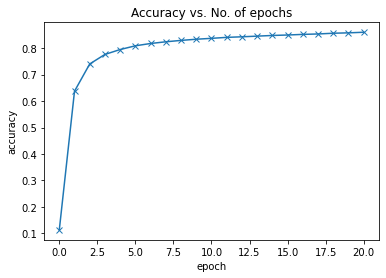

In [41]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [42]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

The .state_dict method returns an OrderedDict containing all the weights and bias matrices mapped to the right attributes of the model.

In [43]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0019,  0.0248, -0.0072,  ..., -0.0172,  0.0182, -0.0100],
                      [-0.0338,  0.0068,  0.0332,  ..., -0.0094,  0.0067,  0.0232],
                      [ 0.0319,  0.0226,  0.0062,  ..., -0.0090, -0.0328, -0.0045],
                      ...,
                      [-0.0155,  0.0136, -0.0081,  ...,  0.0118,  0.0196, -0.0039],
                      [-0.0276,  0.0066, -0.0099,  ...,  0.0245, -0.0338,  0.0258],
                      [-0.0352,  0.0293,  0.0295,  ..., -0.0008, -0.0051, -0.0277]])),
             ('linear.bias',
              tensor([-0.0175,  0.1234, -0.0468, -0.0205,  0.0470,  0.0089, -0.0136,  0.0228,
                      -0.0752, -0.0344]))])